In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.preprocessing import StandardScaler

In [3]:
spendinfo_nps = pd.read_csv('SpendInfo_NPS.csv')

In [4]:
spendinfo_nps.head()

,Unnamed: 0,UltimateParentAccountID,ARR,QuotaRelief,Revenue,AccountID,SFDCAccountID,2020,NPS_GROUP_2020,2021,NPS_GROUP_2021
0,0,0012J00002Jb6X4QAJ,1.805155e+09,1.123077e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0012J00002JbHd3QAF,7.328753e+10,7.824988e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0012J00002JbnjJQAR,5.355804e+09,6.018832e+08,1.0,0012J00002JbnjJQAR,0012J00002JbnjJQAR,8.0,Passive,NaN,NaN
3,3,0012J00002Jc9BeQAJ,1.859820e+10,1.390081e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0012J00002KgQlGQAV,5.355923e+09,4.394930e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
spendinfo_nps.set_index('UltimateParentAccountID', inplace=True)
spendinfo_nps.drop(['Unnamed: 0', 'AccountID', 'SFDCAccountID', 'NPS_GROUP_2020', 'NPS_GROUP_2021'],
                   axis = 1, inplace=True)

In [6]:
#spendinfo_nps['ARR_scaled'] = whiten(spendinfo_nps['ARR'])
#spendinfo_nps['QuotaRelief_scaled'] = whiten(spendinfo_nps['QuotaRelief'])

In [7]:
s = StandardScaler()
s.fit(spendinfo_nps)
standard_spend = pd.DataFrame(s.transform(spendinfo_nps))
standard_spend.columns = spendinfo_nps.columns
#standard_spend.rename(mapper=list(spendinfo_nps.index.values))
standard_spend.index = spendinfo_nps.index
standard_spend.head()

,ARR,QuotaRelief,Revenue,2020,2021
UltimateParentAccountID,,,,,
0012J00002Jb6X4QAJ,-0.314229,-0.160940,NaN,NaN,NaN
0012J00002JbHd3QAF,0.536729,0.132696,NaN,NaN,NaN
0012J00002JbnjJQAR,-0.271960,-0.183776,-1.247219,-0.029382,NaN
0012J00002Jc9BeQAJ,-0.114317,-0.149242,NaN,NaN,NaN
0012J00002KgQlGQAV,-0.271959,-0.017588,NaN,NaN,NaN


In [8]:
#spendinfo_nps.dropna(how='any', inplace=True)
standard_spend.head(2)
#standard_spend.info()

,ARR,QuotaRelief,Revenue,2020,2021
UltimateParentAccountID,,,,,
0012J00002Jb6X4QAJ,-0.314229,-0.160940,NaN,NaN,NaN
0012J00002JbHd3QAF,0.536729,0.132696,NaN,NaN,NaN


In [10]:
nps2020 = standard_spend.dropna(how='any', subset=['Revenue','2020'])
nps2021 = standard_spend.dropna(how='any', subset=['Revenue','2021'])

In [12]:
dist_2020 = linkage(nps2020[['ARR','QuotaRelief','Revenue','2020']], method='centroid',
                               metric = 'euclidean')

In [13]:
dist_2021 = linkage(nps2021[['ARR','QuotaRelief','Revenue','2021']], method='centroid',
                               metric = 'euclidean')

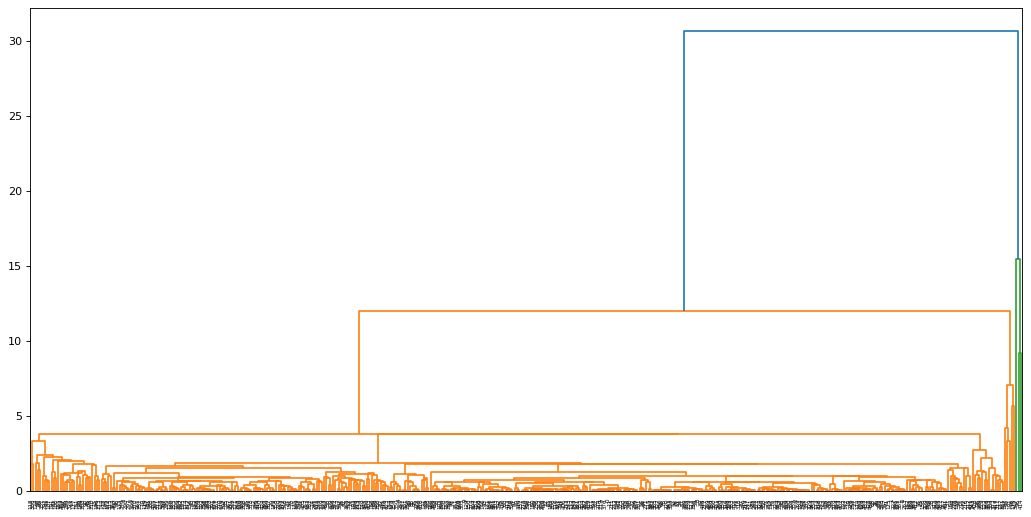

In [14]:
figure(figsize=(16, 8), dpi=80)
dn = dendrogram(dist_2020)
plt.show()

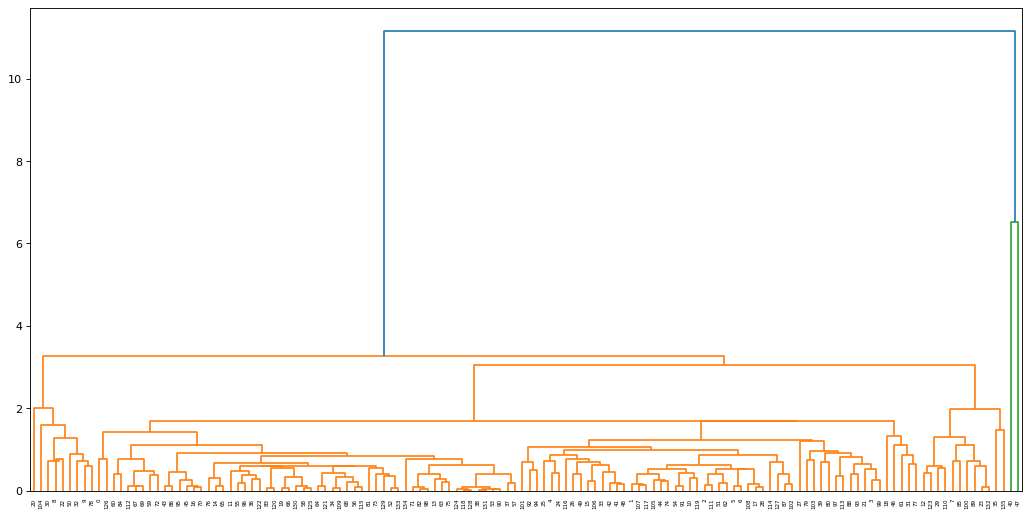

In [15]:
figure(figsize=(16, 8), dpi=80)
dn2 = dendrogram(dist_2021)
plt.show()

In [26]:
nps2020.loc[:,'cluster_labels'] = fcluster(dist_2020, 3, criterion='maxclust')
nps2021.loc[:,'cluster_labels'] = fcluster(dist_2021, 3, criterion='maxclust')

C:\Users\bendi\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


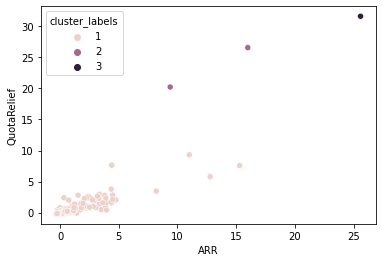

,ARR,QuotaRelief,Revenue,2020,2021,cluster_labels
UltimateParentAccountID,,,,,,
0012J00002JbnjJQAR,-0.271960,-0.183776,-1.247219,-0.029382,NaN,1
0012J00002Lb7kwQAB,-0.006754,-0.104992,-0.069107,0.554258,NaN,1
0012J00002NHvozQAD,-0.274298,-0.147511,-1.247219,0.554258,NaN,1
0012J00002OVNeyQAH,0.005188,0.077863,1.698061,-0.029382,NaN,1
0012J00002OW3D2QAL,-0.276476,-0.144892,-0.069107,-0.613023,NaN,1
0012J00002OW3GOQA1,-0.262462,0.171616,1.698061,0.554258,NaN,1
0012J00002PMgyqQAD,-0.189735,-0.150131,-0.069107,0.554258,NaN,1
0012J00002QNpsHQAT,-0.288408,-0.146514,-1.247219,-0.029382,NaN,1
0012J00002Qj6ypQAB,0.155236,-0.111954,-0.658163,0.554258,NaN,1


In [40]:
sns.scatterplot(x='ARR', y='QuotaRelief', hue='cluster_labels', data=nps2020)
plt.show()
nps2020.head(10)

In [48]:
x = nps2020.loc[nps2020['cluster_labels'] == 3]
print(x)

                               ARR  QuotaRelief   Revenue      2020  2021  \
UltimateParentAccountID                                                     
0015000000wLGDIAA4       25.597722     31.62549  1.698061 -1.780305   NaN   

                         cluster_labels  
UltimateParentAccountID                  
0015000000wLGDIAA4                    3  


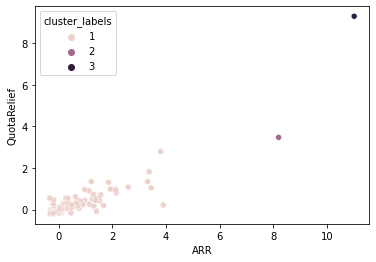

In [32]:
sns.scatterplot(x='ARR', y='QuotaRelief', hue='cluster_labels', data=nps2021)
plt.show()

In [ ]:
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)